In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from statsmodels.tsa.vector_ar.var_model import VAR
from prophet import Prophet
from sklearn.preprocessing import StandardScaler

In [ ]:
from src.config import (
    X_columns,
    y_column
)
from src.model import (
    train_test_split,
    fit_arima_model,
    make_predictions,
    evaluate_model,
    train_time_series_models,
    evaluate_models,
    train_ml_models,

)

from src.plots import plot_model_comparison,plot_ts_model_comparison

In [4]:
df = pd.read_csv("./cleaned_data/p07_model_ready.csv")
df.set_index("dateTime", inplace=True)
df.sort_index(inplace=True)
assert df.isna().sum().sum() == 0, "Data contains NaN values"
df.head()

,resting_heart_rate,avg_overall_sleep_score,fatigue,mood,stress,sleep_quality,very_active_minutes_sum,sedentary_minutes_sum,resting_heart_rate_14_mean,resting_heart_rate_14_std,avg_overall_sleep_score_14_mean,avg_overall_sleep_score_14_std,Subjective_Distress_Score,Physiological_Deviation_Score,Composite_Risk_Score,High_Risk_State,Is_High_Risk_Next_7_Days
dateTime,,,,,,,,,,,,,,,,,
2019-11-21,55.481817,84.0,2.0,3.0,4.0,3.0,94,517,54.523219,1.594162,78.428571,7.977992,1,0,1,0,0
2019-11-22,57.737835,67.0,3.0,3.0,3.0,2.0,9,830,54.804446,1.791905,77.357143,8.454468,1,2,3,1,0
2019-11-23,56.930720,85.0,3.0,3.0,4.0,4.0,30,623,55.039024,1.842910,78.000000,8.682431,0,1,1,0,1
2019-11-24,59.165880,48.0,3.0,3.0,4.0,3.0,86,855,55.423071,2.104138,76.000000,11.832160,0,2,2,0,1
2019-11-25,56.551208,89.0,3.0,3.0,4.0,4.0,49,537,55.704120,1.958144,76.214286,12.052313,0,0,0,0,1


In [5]:
X = df[X_columns]
y = df[y_column]

In [6]:
X

,resting_heart_rate,avg_overall_sleep_score,fatigue,mood,stress,sleep_quality,very_active_minutes_sum,sedentary_minutes_sum,resting_heart_rate_14_mean,resting_heart_rate_14_std,avg_overall_sleep_score_14_mean,avg_overall_sleep_score_14_std
dateTime,,,,,,,,,,,,
2019-11-21,55.481817,84.0,2.0,3.0,4.0,3.0,94,517,54.523219,1.594162,78.428571,7.977992
2019-11-22,57.737835,67.0,3.0,3.0,3.0,2.0,9,830,54.804446,1.791905,77.357143,8.454468
2019-11-23,56.930720,85.0,3.0,3.0,4.0,4.0,30,623,55.039024,1.842910,78.000000,8.682431
2019-11-24,59.165880,48.0,3.0,3.0,4.0,3.0,86,855,55.423071,2.104138,76.000000,11.832160
2019-11-25,56.551208,89.0,3.0,3.0,4.0,4.0,49,537,55.704120,1.958144,76.214286,12.052313
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,60.946530,86.0,3.0,4.0,4.0,4.0,63,710,59.802174,1.526603,80.357143,10.035377
2020-03-21,58.477505,80.0,3.0,3.0,3.0,4.0,79,442,59.842233,1.479967,80.928571,9.746512
2020-03-22,56.849210,79.0,3.0,3.0,3.0,3.0,0,676,59.619209,1.680637,82.500000,6.969715


In [7]:
scaler = StandardScaler()
scaler.fit(X)    

,copy,True
,with_mean,True
,with_std,True


## Model Definition

models = [
    {
        "name": "SARIMAX",
        "call": SARIMAX,
        "params": {
            "order": (1, 1, 1),
            "seasonal_order": (1, 1, 1, 24)
        }
    },
    {
        "name": "LinearRegression",
        "call": LinearRegression,
        "params": {}
    },
    {
        "name": "XGBoost",
        "call": XGBRegressor,
        "params": {
            "n_estimators": 100,
            "max_depth": 3,
            "learning_rate": 0.1,
            "objective": "reg:squarederror"
        }
    },
    {
        "name": "LightGBM",
        "call": LGBMRegressor,
        "params": {
            "n_estimators": 100,
            "max_depth": 3,
            "learning_rate": 0.1
        }
    },
    {
        "name": "RandomForest",
        "call": RandomForestRegressor,
        "params": {
            "n_estimators": 100,
            "max_depth": 5
        }
    },
    {
        "name": "GradientBoosting",
        "call": GradientBoostingRegressor,
        "params": {
            "n_estimators": 100,
            "max_depth": 3,
            "learning_rate": 0.1
        }
    },
    {
        "name": "ARIMA",
        "call": ARIMA,
        "params": {
            "order": (1, 1, 1)
        }
    }
]


In [24]:
classifiers = [
    {
        "name": "LogisticRegression",
        "call": LogisticRegression,
        "params": {
            "max_iter": 1000,
            "solver": "liblinear",
            "C": 1.0,
            "class_weight": "balanced"
        }
    },
    {
        "name": "XGBoost",
        "call": XGBClassifier,      
        "params": {
            "n_estimators": 100,
            "max_depth": 3,
            "learning_rate": 0.1,
            "objective": "binary:logistic",
            "scale_pos_weight": 1,
            "subsample": 0.8,
            "colsample_bytree": 0.8
        }
    },
    {
        "name": "LightGBM",
        "call": LGBMClassifier,
        "params": {
            "n_estimators": 100,
            "max_depth": 3,
            "learning_rate": 0.1,
            "objective": "binary",
            "class_weight": "balanced",
            "boosting_type": "gbdt"
        }
    },
    {
        "name": "RandomForest",
        "call": RandomForestClassifier,
        "params": {
            "n_estimators": 100,
            "max_depth": 5,
            "class_weight": "balanced",
            "min_samples_split": 5,
            "min_samples_leaf": 2
        }
    },
    {
        "name": "GradientBoosting",
        "call": GradientBoostingClassifier,
        "params": {
            "n_estimators": 100,
            "max_depth": 3,
            "learning_rate": 0.1,
            "subsample": 0.8,
            "min_samples_split": 5
        }
    },
    {
        "name": "SVC",
        "call": SVC,
        "params": {
            "kernel": 'linear',
            "C": 1.0,
            "class_weight": "balanced",
            "probability": True
        }
    },
    {
        "name": "DecisionTree",
        "call": DecisionTreeClassifier,
        "params": {
            "max_depth": 5,
            "class_weight": "balanced",
            "min_samples_split": 5,
            "min_samples_leaf": 2
        }
    },
    {
        "name": "KNeighbors",
        "call": KNeighborsClassifier,
        "params": {
            "n_neighbors": 5,
            "weights": "distance",
            "metric": "minkowski"
        }
    },
    {
        "name": "NaiveBayes",
        "call": GaussianNB,
        "params": {
            "var_smoothing": 1e-9
        }
    }
]

ts_models = [

    {
        "name": "ARIMA(1,1,1)",
        "call": ARIMA,
        "params": {
            "order": (1, 1, 1),
            "trend": "c"                  # constant term
        }
    },

    {
        "name": "ARIMA(2,1,2)",
        "call": ARIMA,
        "params": {
            "order": (2, 1, 2),
            "trend": "c"
        }
    },


    {
        "name": "SARIMA_Weekly",
        "call": SARIMAX,
        "params": {
            "order":           (1, 1, 1),
            "seasonal_order":  (1, 1, 1, 7),  
            "enforce_stationarity":  False,
            "enforce_invertibility": False
        }
    },

    {
        "name": "SARIMA_Monthly",
        "call": SARIMAX,
        "params": {
            "order":           (1, 1, 1),
            "seasonal_order":  (1, 1, 1, 30),  
            "enforce_stationarity":  False,
            "enforce_invertibility": False
        }
    },

    {
        "name": "SARIMAX_14dExog",
        "call": SARIMAX,
        "params": {
            "order":           (1, 1, 1),
            "seasonal_order":  (1, 1, 1, 7),
            "enforce_stationarity":  False,
            "enforce_invertibility": False
        }
    }

]

# definition

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
assert X_train.index.dtype == 'datetime64[ns]', "X_train index is not datetime"
assert X_test.index.dtype == 'datetime64[ns]', "X_test index is not datetime"  
assert y_train.index.dtype == 'datetime64[ns]', "y_train index is not datetime"
assert y_test.index.dtype == 'datetime64[ns]', "y_test index is not datetime"

In [10]:
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    index=X_train.index,
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index,
    columns=X_test.columns
)

In [11]:
models = train_ml_models(classifiers, X_train, y_train)

Preparing to train LogisticRegression with parameters: {'max_iter': 1000, 'solver': 'liblinear', 'C': 1.0, 'class_weight': 'balanced'}
LogisticRegression trained successfully.

Preparing to train XGBoost with parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'objective': 'binary:logistic', 'scale_pos_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.8}
XGBoost trained successfully.

Preparing to train LightGBM with parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'objective': 'binary', 'class_weight': 'balanced', 'boosting_type': 'gbdt'}
[LightGBM] [Info] Number of positive: 52, number of negative: 48
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 263
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -

In [25]:
time_series_models_trained = train_time_series_models(ts_models, X_train, y_train)

Preparing to train ARIMA(1,1,1) with parameters: {'order': (1, 1, 1), 'trend': 'c'}
Error training ARIMA(1,1,1): ARIMA.__init__() missing 1 required positional argument: 'endog'

Preparing to train ARIMA(2,1,2) with parameters: {'order': (2, 1, 2), 'trend': 'c'}
Error training ARIMA(2,1,2): ARIMA.__init__() missing 1 required positional argument: 'endog'

Preparing to train SARIMA_Weekly with parameters: {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 7), 'enforce_stationarity': False, 'enforce_invertibility': False}


c:\Users\ahmed\miniconda3\envs\ds1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ahmed\miniconda3\envs\ds1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ahmed\miniconda3\envs\ds1\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ahmed\miniconda3\envs\ds1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ahmed\miniconda3\envs\ds1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency i

SARIMA_Weekly trained successfully.

Preparing to train SARIMA_Monthly with parameters: {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 30), 'enforce_stationarity': False, 'enforce_invertibility': False}


c:\Users\ahmed\miniconda3\envs\ds1\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA_Monthly trained successfully.

Preparing to train SARIMAX_14dExog with parameters: {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 7), 'enforce_stationarity': False, 'enforce_invertibility': False}
Error training SARIMAX_14dExog: SARIMAX.__init__() missing 1 required positional argument: 'endog'

Time series models training complete.


In [13]:
evaluation_results = evaluate_models(models, X_test, y_test)

Evaluating LogisticRegression...
LogisticRegression Accuracy: 0.4000, F1 Score: 0.4306, Precision: 0.4897, Recall: 0.4000

Evaluation complete.
Evaluating XGBoost...
XGBoost Accuracy: 0.6400, F1 Score: 0.6048, Precision: 0.5843, Recall: 0.6400

Evaluation complete.
Evaluating LightGBM...
LightGBM Accuracy: 0.6400, F1 Score: 0.6310, Precision: 0.6239, Recall: 0.6400

Evaluation complete.
Evaluating RandomForest...
RandomForest Accuracy: 0.6400, F1 Score: 0.5620, Precision: 0.5009, Recall: 0.6400

Evaluation complete.
Evaluating GradientBoosting...
GradientBoosting Accuracy: 0.6800, F1 Score: 0.6618, Precision: 0.6520, Recall: 0.6800

Evaluation complete.
Evaluating SVC...
SVC Accuracy: 0.4400, F1 Score: 0.4672, Precision: 0.5138, Recall: 0.4400

Evaluation complete.
Evaluating DecisionTree...
DecisionTree Accuracy: 0.5600, F1 Score: 0.5169, Precision: 0.4800, Recall: 0.5600

Evaluation complete.
Evaluating KNeighbors...
KNeighbors Accuracy: 0.4800, F1 Score: 0.5065, Precision: 0.5685, R

In [14]:
evaluation_results

,Model,Parameters,Accuracy,F1 Score,Precision,Recall
0,LogisticRegression,"{'C': 1.0, 'class_weight': 'balanced', 'dual':...",0.40,0.430560,0.489744,0.40
1,XGBoost,"{'objective': 'binary:logistic', 'base_score':...",0.64,0.604755,0.584286,0.64
2,LightGBM,"{'boosting_type': 'gbdt', 'class_weight': 'bal...",0.64,0.631019,0.623860,0.64
3,RandomForest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.64,0.561951,0.500870,0.64
4,GradientBoosting,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.68,0.661754,0.652000,0.68
5,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.44,0.467222,0.513766,0.44
6,DecisionTree,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",0.56,0.516923,0.480000,0.56
7,KNeighbors,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.48,0.506486,0.568462,0.48
8,NaiveBayes,"{'priors': None, 'var_smoothing': 1e-09}",0.40,0.411429,0.423529,0.40


In [26]:
time_series_evaluation = evaluate_models(time_series_models_trained, X_test, y_test, model_type="time_series")

Evaluating SARIMA_Weekly...
SARIMA_Weekly MSE: 0.6186, R^2: -2.0683, MAE: 0.5561
Evaluating SARIMA_Monthly...
SARIMA_Monthly MSE: 1.6266, R^2: -7.0685, MAE: 1.0695
Evaluation complete.


In [27]:
time_series_evaluation

,Model,Parameters,MSE,MAE,R^2
0,SARIMA_Weekly,resting_heart_rate -0.053805 av...,0.618576,0.556129,-2.068332
1,SARIMA_Monthly,resting_heart_rate -0.025770 av...,1.626607,1.069515,-7.068489


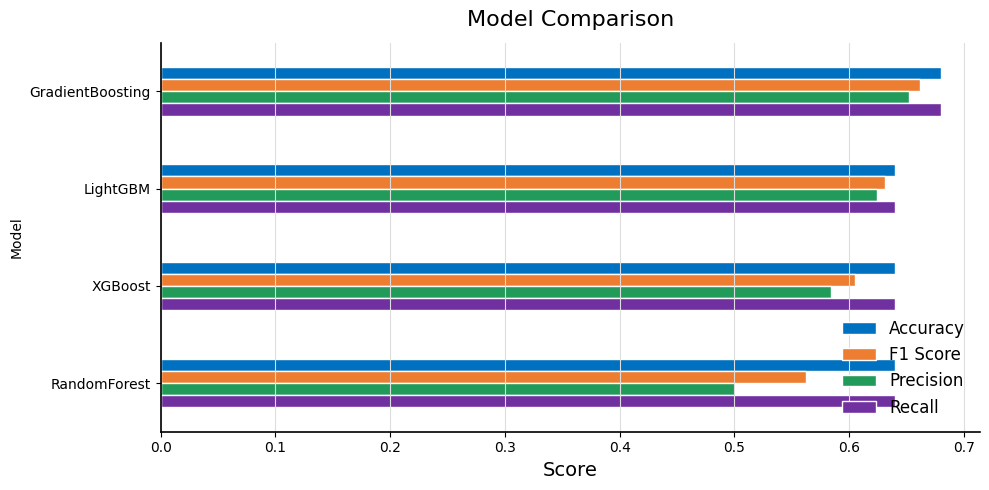

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Model Comparison'}, xlabel='Score', ylabel='Model'>)

In [ ]:
plot_model_comparison(
    evaluation_results,
    top_n=4,
    chart_type='bar',
    figure_size=(10,5),
    save_path="/figures/23rdJune2025_classifiers.svg"
    )

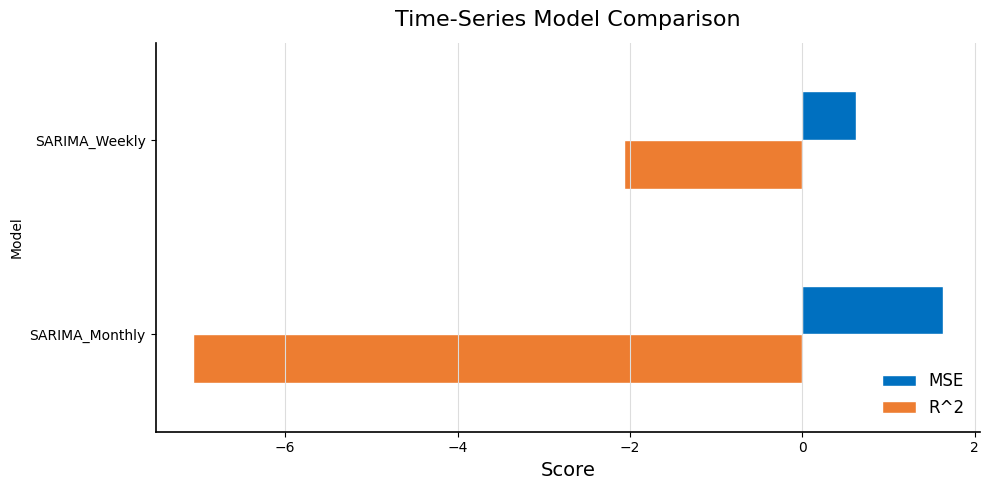

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Time-Series Model Comparison'}, xlabel='Score', ylabel='Model'>)

In [30]:
plot_ts_model_comparison(
    time_series_evaluation,
    metrics=['MSE','R^2'],
    sort_by='MSE',
    ascending=True,
    chart_type='bar',
    figure_size=(10,5),
    save_path='./figures/ts_model_comparison.svg'
)